## General Information

The LDA model was trained 2 different data:

##### 1 - Data 1 :
Preprocessed data (i.e no stop words, stemmatization) enriched with Bi-Grams and performing a CountVectorization on the TITTLE & BODY of the questions and on the TITLE only.
The CountVectorization filter each word with less than 2% frequency within the train corpus for the BODY & TITLE data.
Number of vocabulary = 266
The CountVectorization filter each word with less than 0.9% frequency within the train corpus for the TITLE only data.
Number of Vocabulary = 89

##### 2 - Data 2 :
Preprocessed data (no stop words, stemmatization more) enriched with Bi-Grams.


##### LDA result :
The LDA model using Data 2 has the best results in term of topic coherence, reaching a coherence score of 0.54 and a perplexity score of -9. Additionnaly, the evaluation of the Top 30 words of each topic further confirm the performance of this approach.

The LDA Model number of Topics was selected based on the coherence score, the perplexity score and the comprehension and human understanding of the topics. The most coherent models are the one with 6 and 7 topics.

Github: https://github.com/maurlco/stackoverflow-classification-tag

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
from importlib import reload
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv('/Users/maurelco/Developer/Python/Projet 4/data/Cleaned/df_process_text_3.csv')

In [3]:
print('Shape of Dataset : ', df.shape)
df.head(5)

Shape of Dataset :  (50000, 9)


,Title,Body,Tags,_clean_tags,_len_body,Body_2,_len_body_2,Body_3,Title_2
0,giving unix process exclusive rw access directory,way sandbox linux process certain directory gi...,linux ubuntu process sandbox selinux,"['linux', 'ubuntu', 'process', 'sandbox', 'sel...",526,sandbox linux process certain directory give p...,462,sandbox linux process certain directory proces...,giving unix process exclusive rw access directory
1,automatic repaint minimizing window,jframe two panel one panel draw line working m...,java graphics jframe jpanel paint,"['java', 'graphics', 'jframe', 'jpanel', 'paint']",2969,jframe two panel panel draw line working minim...,2855,jframe panel panel draw line minimized window ...,automatic repaint minimizing window
2,man-in-the-middle attack security threat ssh a...,expert network security pardon question smart ...,security ssh ssh-keys openssh man-in-the-middle,"['security', 'ssh', 'ssh-keys', 'openssh', 'ma...",447,expert network security pardon smart automatin...,414,expert network security pardon smart automatin...,man-in-the-middle attack security threat ssh a...
3,managing data access simple winforms app,simple winforms data entry app us sqlite alway...,c# winforms sqlite datatable sqlconnection,"['c#', 'winforms', 'sqlite', 'datatable', 'sql...",2537,simple winforms entry app u sqlite always sing...,2382,winforms entry app sqlite always single-user a...,managing data access winforms app
4,render basic html view,basic node.js app trying get ground using expr...,javascript html node.js mongodb express,"['javascript', 'html', 'node.js', 'mongodb', '...",335,basic node.js app get ground express framework...,292,basic node.js app get ground express framework...,render basic html view


In [4]:
df.loc[37847,'Title_2'] = 'nan'
df.loc[14558,'Title_2'] = 'call'
df.loc[19855,'Body_3'] = 'correct'
df.loc[37847,'Title'] = 'nan'

In [5]:
df['body_and_title_2'] = df['Body_3'] + " " +df['Title_2']

In [6]:
df.isna().sum()

Title               0
Body                0
Tags                0
_clean_tags         0
_len_body           0
Body_2              0
_len_body_2         0
Body_3              0
Title_2             0
body_and_title_2    0
dtype: int64

## Separating Train /Test

In [7]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
print('Train Shape and Test shape : ',train.shape, test.shape)

Train Shape and Test shape :  (35000, 10) (15000, 10)


In [8]:
list_body_train = list(train['Body_3'])
list_title_train = list(train['Title_2'])
list_title_body_train = list(train['body_and_title_2'])
list_body_test = list(test['Body_3'])
list_title_test = list(test['Title_2'])
list_title_body_test = list(test['body_and_title_2'])

## Make Bi-grams

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [10]:
data_words_train = list(sent_to_words(list_title_body_train))
data_words_test = list(sent_to_words(list_title_body_test))
print(data_words_train[:1])

[['apology', 'sound', 'noobish', 'lot', 'experience', 'web', 'development', 'flash', 'aside', 'find', 'best', 'solution', 'project', 'sql', 'echo', 'php', 'file', 'echo', 'border', 'tr', 'objectname', 'url', 'description', 'picture', 'price', 'location', 'category', 'priority', 'tr', 'row', 'echo', 'tr', 'echo', 'row', 'echo', 'row', 'objectname', 'echo', 'row', 'url', 'echo', 'row', 'description', 'echo', 'row', 'picture', 'echo', 'row', 'price', 'echo', 'row', 'location', 'echo', 'row', 'category', 'echo', 'row', 'priority', 'echo', 'row', 'echo', 'row', 'echo', 'tr', 'echo', 'pull', 'whole', 'sql', 'user', 'echo', 'row', 'separately', 'separate', 'vizualize', 'echo', 'tile', 'isotope', 'jquery', 'plug', 'http', 'isotope', 'metafizzy', 'co', 'best', 'dynamically', 'generate', 'divs', 'based', 'row', 'fill', 'row', 'sorry', 'broad', 'create', 'divs', 'tile', 'sql', 'table']]


In [11]:
# Build the bigram and trigram models
bigram_train = gensim.models.Phrases(data_words_train, min_count=30, threshold=50) # higher threshold fewer phrases.
bigram_test = gensim.models.Phrases(data_words_test, min_count=30, threshold=50)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_train = gensim.models.phrases.Phraser(bigram_train)
bigram_mod_test = gensim.models.phrases.Phraser(bigram_test)

In [12]:
def make_bigrams(texts, bigram_mod):
    # [y for x in [test_list1, test_list2] for y in x]
    list_of_sentence_as_list = [bigram_mod[doc] for doc in texts]
    return [ " ".join(sentence_as_list) for sentence_as_list in list_of_sentence_as_list]


In [13]:
# Form Bigrams
list_title_body_train = make_bigrams(data_words_train, bigram_mod_train)
list_title_body_test = make_bigrams(data_words_test, bigram_mod_test)

## Vectorization

### Strategy 1 : FIT on TITTLE + BODY and TRANSFORM on TITLE + BODY

In [14]:
vectorizer_1 = CountVectorizer(
    lowercase=False,
    analyzer='word',
    min_df=0.01,
    token_pattern= r'[a-zA_][a-zA_\#+-]*',
    )
matrix_train_1 = vectorizer_1.fit_transform(list_title_body_train)

In [15]:
matrix_test_1 = vectorizer_1.transform(list_title_body_test)

In [16]:
vec_1_features = vectorizer_1.get_feature_names_out()

In [17]:
vec_1_features

array(['accept', 'access', 'accomplish', 'according', 'account',
       'achieve', 'action', 'active', 'activity', 'actual', 'actually',
       'add', 'adding', 'additional', 'admin', 'advance', 'advice',
       'ajax', 'alert', 'algorithm', 'allow', 'allowed', 'allows',
       'almost', 'along', 'alternative', 'although', 'always', 'amount',
       'android', 'angular', 'animation', 'annotation', 'anybody',
       'anything', 'anyway', 'apache', 'api', 'app', 'appear', 'appears',
       'append', 'apple', 'application', 'apply', 'appreciate',
       'appreciated', 'approach', 'appropriate', 'apps', 'area', 'args',
       'argument', 'around', 'array', 'article', 'ask', 'asked',
       'asp_net', 'aspx', 'assembly', 'assign', 'assume', 'async',
       'attempt', 'attempting', 'attr', 'attribute', 'auth',
       'authentication', 'auto', 'automatically', 'available', 'avoid',
       'await', 'aws', 'back', 'backend', 'background',
       'background_color', 'bad', 'bar', 'base', 'based'

In [91]:
count_array_1 = matrix_test_1.toarray()
df_vec_1 = pd.DataFrame(data=count_array_1,columns = vectorizer_1.get_feature_names_out())
df_vec_1

,access,action,actually,add,adding,advance,always,android,anything,api,...,view,void,web,website,width,window,within,writing,written,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,3,0,0,0,0,4,1,0,0,0
2,1,0,0,0,0,1,0,2,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_vec_1_train = pd.DataFrame(data=matrix_train_1.toarray(),columns = vectorizer_1.get_feature_names_out())
df_vec_1_train

,access,action,actually,add,adding,advance,always,android,anything,api,...,view,void,web,website,width,window,within,writing,written,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
34996,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
34997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,4,0,0,0,0,2
34998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


### Strategy 2 : FIT on TITTLE and TRANSFORM on TITLE

In [152]:
vectorizer_2 = CountVectorizer(
    lowercase=False,
    analyzer='word',
    min_df=0.009,
    token_pattern= r'[a-zA_\-+#]*\.?[a-zA_\+#]+',
    )
matrix_2_train = vectorizer_2.fit_transform(list_title_train)

In [153]:
vectorizer_2.get_feature_names_out()

array(['.net', 'access', 'add', 'ajax', 'android', 'angular', 'api',
       'app', 'application', 'array', 'asp.net', 'button', 'c', 'c#',
       'c++', 'call', 'class', 'code', 'convert', 'create', 'data',
       'database', 'django', 'element', 'error', 'field', 'file', 'find',
       'form', 'function', 'get', 'google', 'html', 'http', 'image',
       'input', 'io', 'java', 'javascript', 'jquery', 'json', 'key',
       'library', 'line', 'list', 'load', 'make', 'method', 'model',
       'multiple', 'mvc', 'mysql', 'object', 'one', 'page', 'php',
       'project', 'property', 'python', 'query', 'request', 'row', 'run',
       'script', 'server', 'service', 'set', 'show', 'spring', 'sql',
       'string', 'studio', 'table', 'test', 'text', 'time', 'type', 'url',
       'use', 'user', 'using', 'v', 'value', 'view', 'way', 'web',
       'window', 'work', 'xml'], dtype=object)

In [154]:
matrix_2_test = vectorizer_2.transform(list_title_test)

In [35]:
count_array_2 = matrix_2_test.toarray()
df_vec_2 = pd.DataFrame(data=count_array_2,columns = vectorizer_2.get_feature_names_out())
df_vec_2

,.net,access,add,ajax,android,angular,api,app,application,array,...,user,using,v,value,view,way,web,window,work,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Create LDA corpus, id2word & dictionary

### Strategy 1: CountVectorizer + LDA

In [105]:
matrix = matrix_train_1
documents = [    [vectorizer_1.get_feature_names_out()[idx] for idx in matrix[doc_idx, :].indices]
                 for doc_idx in range(matrix.shape[0])
                 ]


In [156]:
matrix_st2 = matrix_2_train
documents_st2 = [    [vectorizer_2.get_feature_names_out()[idx] for idx in matrix_st2[doc_idx, :].indices]
                 for doc_idx in range(matrix_st2.shape[0])
                 ]

In [106]:
matrix_2 = matrix_train_1
documents_2 = [    [vectorizer_1.get_feature_names_out()[idx] for idx in matrix_2[doc_idx, :].indices]
                 for doc_idx in range(matrix_2.shape[0])
                 ]

In [106]:
X = matrix_train_1
id2word = corpora.Dictionary(documents)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=id2word)

### Strategy 2: No Vectorization prior LDA

In [18]:
def make_bigrams(texts):
    return [bigram_mod_train[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words_train)

In [19]:
data_words_bigrams

[['apology',
  'sound',
  'noobish',
  'lot',
  'experience',
  'web',
  'development',
  'flash',
  'aside',
  'find',
  'best',
  'solution',
  'project',
  'sql',
  'echo',
  'php',
  'file',
  'echo',
  'border',
  'tr',
  'objectname',
  'url',
  'description',
  'picture',
  'price',
  'location',
  'category',
  'priority',
  'tr',
  'row',
  'echo',
  'tr',
  'echo',
  'row',
  'echo',
  'row',
  'objectname',
  'echo',
  'row',
  'url',
  'echo',
  'row',
  'description',
  'echo',
  'row',
  'picture',
  'echo',
  'row',
  'price',
  'echo',
  'row',
  'location',
  'echo',
  'row',
  'category',
  'echo',
  'row',
  'priority',
  'echo',
  'row',
  'echo',
  'row',
  'echo',
  'tr',
  'echo',
  'pull',
  'whole',
  'sql',
  'user',
  'echo',
  'row',
  'separately',
  'separate',
  'vizualize',
  'echo',
  'tile',
  'isotope',
  'jquery',
  'plug',
  'http',
  'isotope',
  'metafizzy',
  'co',
  'best',
  'dynamically',
  'generate',
  'divs',
  'based',
  'row',
  'fill',
 

In [20]:
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_words_bigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 18), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2)]


## Optimize Number of Topics

In [17]:
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    topic_coherence_values=[]
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Implementing LDA ... number of topic : ', num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,random_state=0,passes=2,minimum_probability=0.05,per_word_topics=True,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
        topic_coherence_values.append(coherencemodel.get_coherence_per_topic())

    return model_list, coherence_values, perplexity_values, topic_coherence_values

### U_MASS - Strategy 1

In [100]:
#Using the U_MASS
model_list_umass, coherence_values_umass, perplexity_values_umass, topic_coherence_values_umass = compute_coherence_values(dictionary=id2word,corpus=corpus, texts=documents, start=2, limit=12, step=1)

Implementing LDA ... number of topic :  2
Implementing LDA ... number of topic :  3
Implementing LDA ... number of topic :  4
Implementing LDA ... number of topic :  5
Implementing LDA ... number of topic :  6
Implementing LDA ... number of topic :  7
Implementing LDA ... number of topic :  8
Implementing LDA ... number of topic :  9
Implementing LDA ... number of topic :  10
Implementing LDA ... number of topic :  11


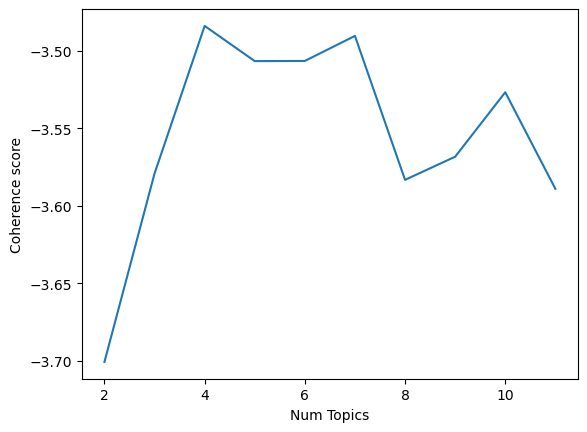

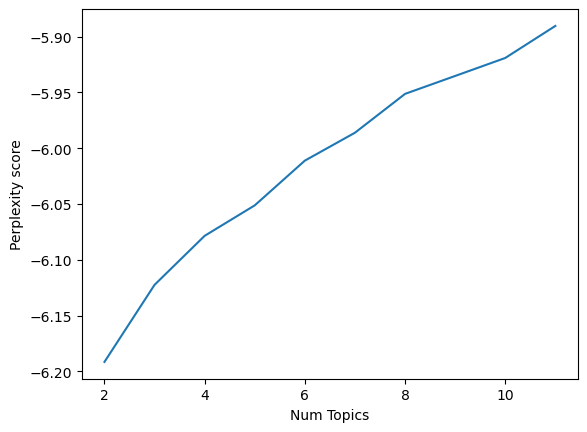

In [101]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

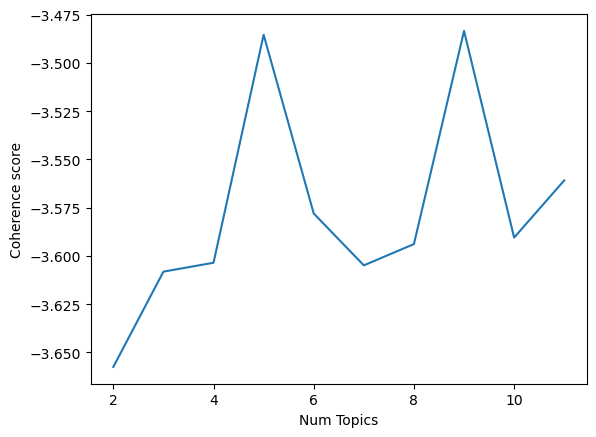

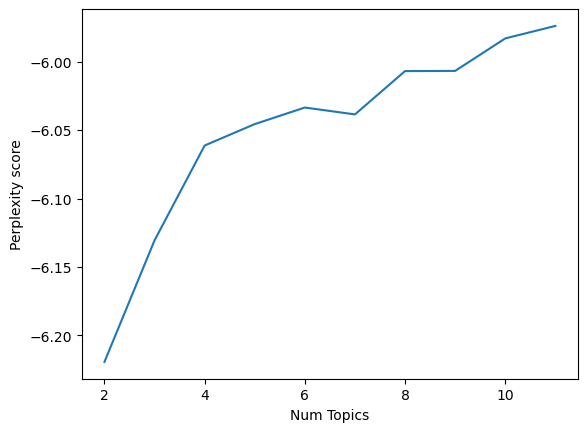

In [73]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

### C_V - Startegy 1

In [110]:
#C_V, Using CountVectorizer Strategy 1 (Body & Title)
model_list_cv, coherence_values_cv, perplexity_values_cv, topic_coherence_values_cv = compute_coherence_values(dictionary=id2word,corpus=corpus, texts=documents_2, start=2, limit=12, step=1)

Implementing LDA ... number of topic :  2
Implementing LDA ... number of topic :  3
Implementing LDA ... number of topic :  4
Implementing LDA ... number of topic :  5
Implementing LDA ... number of topic :  6
Implementing LDA ... number of topic :  7
Implementing LDA ... number of topic :  8
Implementing LDA ... number of topic :  9
Implementing LDA ... number of topic :  10
Implementing LDA ... number of topic :  11


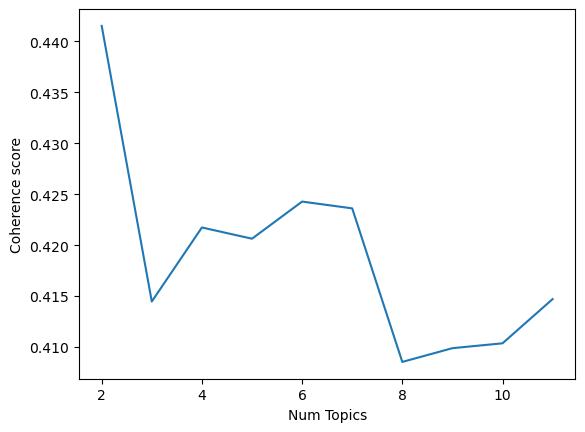

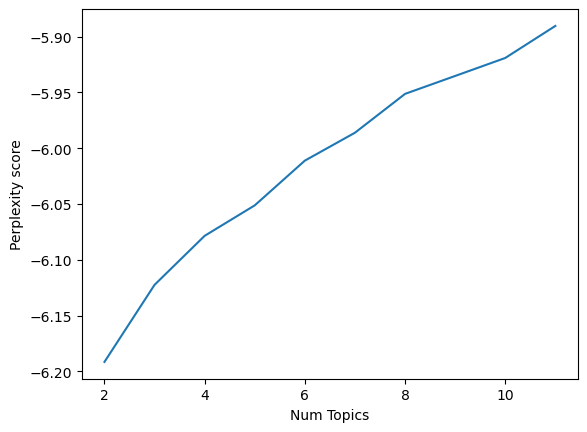

In [94]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

In [166]:
# C_V, Using CountVectorizer Startegy 1 (Title only)
model_list_cv_st2, coherence_values_cv_st2, perplexity_values_cv_st2, topic_coherence_values_cv_st2 = compute_coherence_values(dictionary=id2word,corpus=corpus, texts=documents_st2, start=2, limit=12, step=1)

Implementing LDA ... number of topic :  2
Implementing LDA ... number of topic :  3
Implementing LDA ... number of topic :  4
Implementing LDA ... number of topic :  5
Implementing LDA ... number of topic :  6
Implementing LDA ... number of topic :  7
Implementing LDA ... number of topic :  8
Implementing LDA ... number of topic :  9
Implementing LDA ... number of topic :  10
Implementing LDA ... number of topic :  11


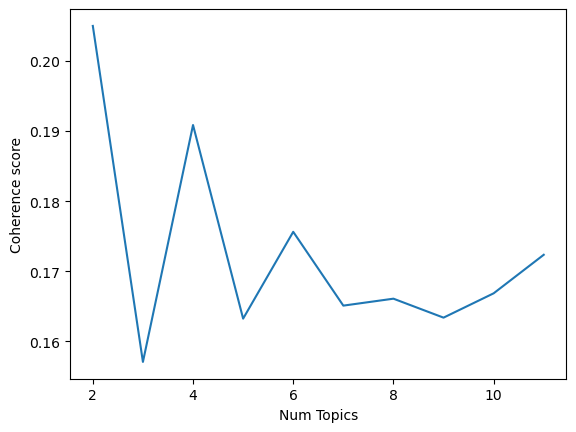

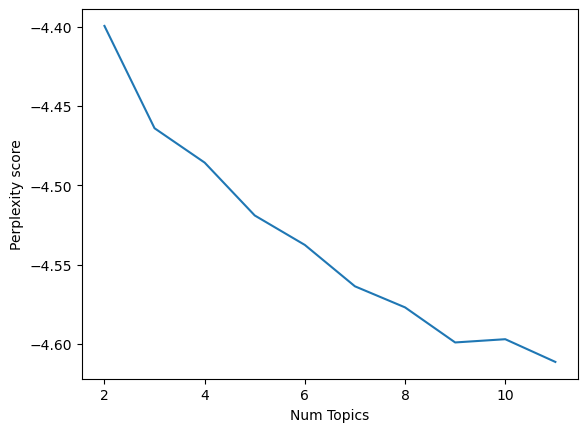

In [167]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

### C_V & Strategie 2

In [22]:
model_list_cv_st2, coherence_values_cv_st2, perplexity_values_cv_st2, topic_coherence_values_cv_st2 = compute_coherence_values(dictionary=id2word,corpus=corpus, texts=texts, start=2, limit=12, step=1)

Implementing LDA ... number of topic :  2
Implementing LDA ... number of topic :  3
Implementing LDA ... number of topic :  4
Implementing LDA ... number of topic :  5
Implementing LDA ... number of topic :  6
Implementing LDA ... number of topic :  7
Implementing LDA ... number of topic :  8
Implementing LDA ... number of topic :  9
Implementing LDA ... number of topic :  10
Implementing LDA ... number of topic :  11


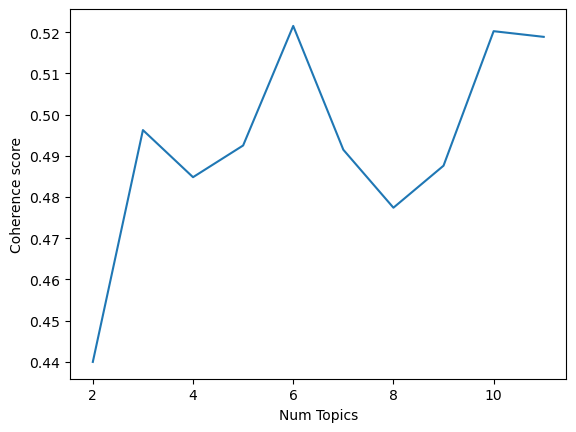

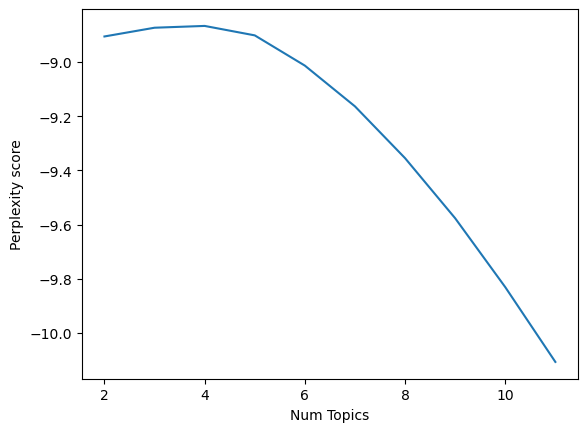

In [138]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

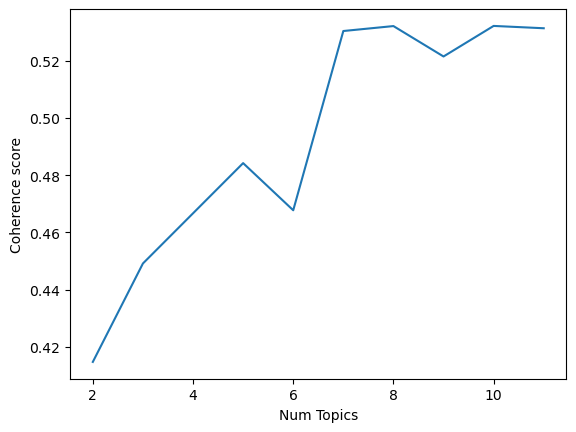

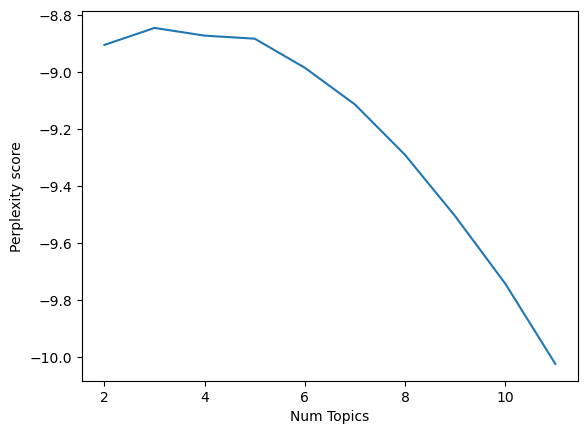

In [23]:
# Show Coherence graph
limit=12; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

#Show Perplexity/ Likelyhood - must be low
plt.plot(x, perplexity_values_cv_st2)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.show()

In [29]:
topic_coherence_values_cv_st2

[[0.3939905524389373, 0.43559791047791857],
 [0.458217235174999, 0.3840829123941877, 0.5052070095890113],
 [0.479133251669544,
  0.4827524880942927,
  0.5352237615187798,
  0.3696257808725866],
 [0.5597115708762048,
  0.41030117615825573,
  0.5657718775410929,
  0.42795287684172034,
  0.4572921114035088],
 [0.5738406849576656,
  0.3817250174412311,
  0.5999387313452074,
  0.4308071223487532,
  0.44928138827330966,
  0.3708831691181861],
 [0.5798790494824444,
  0.6457221709566034,
  0.6517362182678049,
  0.4704885782646051,
  0.46393096983575405,
  0.43837076036042594,
  0.4622040457807037],
 [0.5798790494824444,
  0.6683823227208868,
  0.5877596187652407,
  0.43449450129013717,
  0.46835303270807016,
  0.4791143270320807,
  0.47093168034452926,
  0.5675517584631338],
 [0.5711504423383134,
  0.5301986612086425,
  0.6960960011438982,
  0.3692923038650598,
  0.5221053087776519,
  0.487683872727332,
  0.5131312674310379,
  0.49462304871383467,
  0.5087021661399463],
 [0.6018583550550332,
 

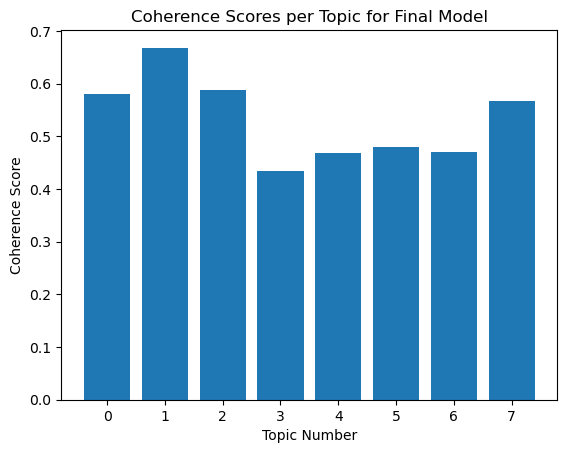

In [58]:
x= range(len(topic_coherence_values_cv_st2[6]))
plt.bar(x,topic_coherence_values_cv_st2[6])
plt.xlabel("Topic Number")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores per Topic for Final Model")
plt.show()

## Implement the Final Model

### 6 Topics & prior CountVectorization

In [107]:
model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=6,passes=2,minimum_probability=0.05,per_word_topics=True,id2word=id2word)

In [115]:
model.get_topics()

array([[1.4566171e-03, 3.0866512e-03, 8.8496885e-04, ..., 5.6635408e-04,
        4.6319515e-04, 2.0850448e-04],
       [6.3674117e-04, 2.5960433e-03, 6.4386596e-04, ..., 2.6737212e-04,
        2.4070071e-04, 1.0865415e-03],
       [3.3066638e-03, 2.3143340e-03, 2.3908997e-05, ..., 3.5527570e-05,
        2.5170859e-05, 3.0057142e-02],
       [8.6322604e-03, 5.3488871e-04, 1.8894434e-03, ..., 1.4496703e-03,
        1.7365080e-03, 4.5289313e-03],
       [1.2862373e-03, 7.9505297e-04, 2.6520633e-03, ..., 3.2128717e-03,
        2.0399904e-03, 6.0729176e-04],
       [1.1635191e-03, 7.6129157e-03, 4.8861653e-04, ..., 2.3574108e-04,
        2.5114632e-04, 3.6275084e-04]], dtype=float32)

### 6 Topics - No prior Vectorization

In [24]:
model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=7,id2word=id2word, minimum_probability=0.05,passes=5)

In [25]:
model_2.get_topics()

array([[5.1297939e-05, 2.0735117e-05, 1.8100209e-03, ..., 1.6170631e-07,
        1.9059397e-07, 1.6170631e-07],
       [2.5547661e-07, 2.5444987e-07, 1.2914659e-04, ..., 2.5333921e-07,
        2.5334077e-07, 2.5333921e-07],
       [4.0661359e-07, 5.1890702e-06, 3.2169319e-04, ..., 5.6175344e-07,
        1.1689233e-06, 5.6175344e-07],
       ...,
       [5.0314746e-05, 7.4606840e-05, 1.1461675e-03, ..., 2.6681610e-07,
        2.6681775e-07, 2.6681610e-07],
       [3.9094456e-07, 3.9093251e-07, 2.8460141e-05, ..., 3.9026236e-07,
        3.9026585e-07, 3.9026236e-07],
       [1.6384256e-06, 1.5964596e-06, 2.8860345e-04, ..., 3.6638261e-07,
        5.1235872e-07, 3.6638261e-07]], dtype=float32)

In [21]:
model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=7,id2word=id2word, minimum_probability=0.05,passes=5)

### Display Topics words

In [108]:
pprint(model.print_topics())

[(0,
  '0.029*"asked" + 0.025*"center" + 0.025*"figure" + 0.023*"configuration" + '
  '0.020*"seem" + 0.018*"returned" + 0.016*"function" + 0.016*"goal" + '
  '0.016*"flag" + 0.015*"blank"'),
 (1,
  '0.086*"filename" + 0.047*"reading" + 0.039*"url" + 0.020*"initialize" + '
  '0.019*"output" + 0.017*"longer" + 0.016*"super" + 0.015*"displayed" + '
  '0.015*"configuration" + 0.014*"dev"'),
 (2,
  '0.048*"attempt" + 0.048*"response" + 0.040*"little" + 0.033*"guy" + '
  '0.025*"dialog" + 0.024*"util" + 0.023*"greatly_appreciated" + 0.021*"style" '
  '+ 0.017*"turn" + 0.016*"believe"'),
 (3,
  '0.049*"var" + 0.031*"validation" + 0.031*"plugin" + 0.027*"python" + '
  '0.022*"clicking" + 0.021*"reading" + 0.016*"corresponding" + 0.014*"people" '
  '+ 0.013*"instance" + 0.013*"jpg"'),
 (4,
  '0.048*"fast" + 0.043*"protocol" + 0.027*"reason" + 0.023*"attempt" + '
  '0.020*"management" + 0.019*"instance" + 0.017*"article" + 0.016*"returned" '
  '+ 0.016*"collection" + 0.013*"suppose"'),
 (5,
  '

In [20]:
pprint(model_2.print_topics())

[(0,
  '0.014*"file" + 0.007*"time" + 0.007*"array" + 0.007*"get" + 0.007*"code" + '
  '0.006*"image" + 0.006*"row" + 0.006*"date" + 0.006*"query" + 0.006*"sql"'),
 (1,
  '0.057*"java" + 0.021*"file" + 0.013*"version" + 0.010*"build" + 0.010*"lib" '
  '+ 0.010*"jar" + 0.009*"project" + 0.008*"com" + 0.007*"python" + '
  '0.007*"server"'),
 (2,
  '0.013*"int" + 0.011*"code" + 0.011*"class" + 0.011*"string" + '
  '0.010*"public" + 0.009*"object" + 0.007*"system" + 0.007*"get" + '
  '0.007*"void" + 0.007*"window"'),
 (3,
  '0.018*"user" + 0.015*"string" + 0.014*"public" + 0.013*"get" + '
  '0.012*"request" + 0.011*"http" + 0.010*"class" + 0.010*"id" + '
  '0.009*"server" + 0.008*"response"'),
 (4,
  '0.020*"class" + 0.018*"function" + 0.015*"js" + 0.014*"id" + 0.013*"html" + '
  '0.013*"text" + 0.011*"button" + 0.011*"var" + 0.010*"php" + 0.010*"type"'),
 (5,
  '0.044*"android" + 0.025*"self" + 0.017*"view" + 0.015*"app" + '
  '0.010*"public" + 0.010*"id" + 0.009*"import" + 0.008*"void" +

In [26]:
pprint(model_2.print_topics())

[(0,
  '0.017*"user" + 0.011*"get" + 0.011*"server" + 0.010*"request" + '
  '0.008*"code" + 0.007*"http" + 0.007*"client" + 0.007*"service" + '
  '0.007*"database" + 0.006*"message"'),
 (1,
  '0.025*"function" + 0.023*"class" + 0.017*"js" + 0.016*"html" + 0.015*"var" '
  '+ 0.014*"id" + 0.013*"type" + 0.013*"text" + 0.013*"button" + 0.009*"http"'),
 (2,
  '0.046*"android" + 0.034*"id" + 0.018*"public" + 0.016*"string" + '
  '0.013*"null" + 0.012*"list" + 0.011*"view" + 0.011*"select" + '
  '0.009*"private" + 0.009*"class"'),
 (3,
  '0.041*"file" + 0.010*"python" + 0.010*"project" + 0.010*"build" + '
  '0.010*"lib" + 0.009*"version" + 0.009*"app" + 0.007*"module" + '
  '0.006*"library" + 0.006*"command"'),
 (4,
  '0.018*"image" + 0.011*"int" + 0.009*"size" + 0.008*"function" + '
  '0.008*"code" + 0.007*"array" + 0.006*"time" + 0.005*"width" + 0.005*"point" '
  '+ 0.005*"height"'),
 (5,
  '0.097*"java" + 0.017*"class" + 0.016*"jar" + 0.015*"public" + 0.012*"com" + '
  '0.009*"http" + 0.0

## Evaluate the LDA model

### Model 1 - 6 Topics - CountVectorizer

In [117]:
# Compute Perplexity for 6 topics
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.927582809495066

Coherence Score:  0.5098622078418832


In [109]:
# Compute Perplexity for 6 topics
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.011477566318162

Coherence Score:  0.38975879596896057


### Model 2 - 6 Topics - No Vectorization

In [142]:
# Compute Perplexity for 6 topics
print('\nPerplexity: ', model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model_2, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.016888283445718

Coherence Score:  0.5467025462814031


### Model 2 - 7 Topics - No Vectorization

In [22]:
# Compute Perplexity for 7 topics
print('\nPerplexity: ', model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model_2, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.04352807568739

Coherence Score:  0.558605311124791


In [ ]:
# Mtopics-words (topics en ligne et words du bag of words en colonnes) = probabilité de mots pour chaque topic.
# M(train)quest-topics (questions Train en ligne et topics en colonnes, résultat du fit du LDA sur les questions Train) = probabilité pour une question d’appartenir à chacun des topics.
# Pour retrouver les probabilités de mots pour les questions Train, il suffit de calculer la matrice M(train)qest-words = M(train)quest-topics x Mtopics-words.
# Pour trouver les probabilités de mots pour les questions Test, il suffit de reprendre la même formule, sachant que M(test)quest-topics est le résultat du predict du LDA sur les questions Test.


## Visualize the Topic distribution

### Model 6 topics - Strategy 1 (CountVec)

T1 : UI/front
T2 : DevOps theme
T3 : unclear
T4 : unclear
T5 : data centric / unclear
T6 : Javascript / PHP/ unclear

In [118]:
#6 topics
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

num_topics = 6
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.115663  0.151353       1        1  23.861015
5      0.050434  0.042749       2        1  19.266548
0      0.145924 -0.139012       3        1  17.299221
1      0.166281 -0.093809       4        1  14.876260
4      0.058632  0.173146       5        1  14.751390
2     -0.305609 -0.134426       6        1   9.945566, topic_info=             Term          Freq         Total Category  logprob  loglift
122           com  36193.000000  36193.000000  Default  30.0000  30.0000
7          jquery  16390.000000  16390.000000  Default  29.0000  29.0000
178       writing  21989.000000  21989.000000  Default  28.0000  28.0000
34   successfully  32369.000000  32369.000000  Default  27.0000  27.0000
222       process  25694.000000  25694.000000  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
34   successfully   2089.381309  32369.389957   Topic6  -4.1772  -0.4323
175        python    649.449033   4757.162274   Topic6  -5.3457   0.3168
176          seem    789.021037   8742.668892   Topic6  -5.1511  -0.0971
201    javascript    836.162373  13076.071529   Topic6  -5.0930  -0.4417
222       process    957.028852  25694.897216   Topic6  -4.9580  -0.9822

[274 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
257       1  0.000104  access
257       2  0.000311  access
257       3  0.976666  access
257       4  0.001038  access
257       5  0.000208  access
...     ...       ...     ...
249       2  0.841556     xml
249       3  0.002084     xml
249       4  0.007758     xml
249       5  0.000463     xml
249       6  0.061021     xml

[1037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 2, 5, 3])

### Model 6 topics - Strategy 2 (no CountVec)

T1 : UI/front
T2 : Web application
T3 : Programmation language - generic
T4 : python
T5 : data centric
T6 : Java

In [144]:
#6 topics
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

num_topics = 6
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.136402 -0.065621       1        1  26.143693
5      0.016153  0.046465       2        1  24.742801
0      0.033519 -0.220236       3        1  15.756649
4     -0.017558  0.214020       4        1  13.211318
3      0.150616  0.058409       5        1  11.107090
2     -0.319134 -0.033036       6        1   9.038449, topic_info=               Term          Freq         Total Category  logprob  loglift
75             java  31451.000000  31451.000000  Default  30.0000  30.0000
282          string  27398.000000  27398.000000  Default  29.0000  29.0000
2320        android  15836.000000  15836.000000  Default  28.0000  28.0000
15             file  32243.000000  32243.000000  Default  27.0000  27.0000
272          public  23313.000000  23313.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
68            final   1251.078243   2980.668111   Topic6  -5.6352   1.5355
244          import   1723.419941  14223.000113   Topic6  -5.3149   0.2931
713            core   1298.251249   3823.468974   Topic6  -5.5982   1.3235
59    configuration   1251.983298   3599.799993   Topic6  -5.6345   1.3475
33          project   1291.443673   8896.337421   Topic6  -5.6035   0.4738

[507 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
2506       1  0.082246  access
2506       2  0.700703  access
2506       3  0.057664  access
2506       4  0.034231  access
2506       5  0.032853  access
...      ...       ...     ...
19535      3  0.996079     xor
4897       1  0.004422     xsd
4897       4  0.060436     xsd
4897       6  0.934549     xsd
9506       5  0.996342     xsl

[1381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 1, 5, 4, 3])

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.136402 -0.065621       1        1  26.143719
5      0.016153  0.046465       2        1  24.742076
0      0.033519 -0.220236       3        1  15.756402
4     -0.017558  0.214020       4        1  13.212011
3      0.150616  0.058409       5        1  11.107401
2     -0.319134 -0.033036       6        1   9.038391, topic_info=               Term          Freq         Total Category  logprob  loglift
75             java  31451.000000  31451.000000  Default  30.0000  30.0000
282          string  27397.000000  27397.000000  Default  29.0000  29.0000
2320        android  15836.000000  15836.000000  Default  28.0000  28.0000
15             file  32244.000000  32244.000000  Default  27.0000  27.0000
272          public  23312.000000  23312.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
68            final   1251.070220   2980.644307   Topic6  -5.6352   1.5355
244          import   1723.408888  14223.206508   Topic6  -5.3149   0.2931
713            core   1298.242923   3823.510293   Topic6  -5.5982   1.3235
59    configuration   1251.975269   3599.775944   Topic6  -5.6345   1.3475
33          project   1291.435391   8896.515052   Topic6  -5.6035   0.4738

[507 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
2506       1  0.082248  access
2506       2  0.700717  access
2506       3  0.057666  access
2506       4  0.034232  access
2506       5  0.032853  access
...      ...       ...     ...
19535      3  0.996095     xor
4897       1  0.004422     xsd
4897       4  0.060436     xsd
4897       6  0.934552     xsd
9506       5  0.996314     xsl

[1381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 1, 5, 4, 3])

In [28]:
#6 topics
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

num_topics = 7
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.070925  0.096090       1        1  24.507190
3      0.049168  0.246172       2        1  16.108832
1      0.049196 -0.090139       3        1  14.683130
4      0.231605 -0.007402       4        1  14.222697
6     -0.003568 -0.117987       5        1  11.475578
2     -0.075495 -0.219123       6        1   9.675611
5     -0.321830  0.092390       7        1   9.326961, topic_info=               Term          Freq         Total Category  logprob  loglift
79             java  36134.000000  36134.000000  Default  30.0000  30.0000
2352        android  17657.000000  17657.000000  Default  29.0000  29.0000
15             file  31804.000000  31804.000000  Default  28.0000  28.0000
528              id  24607.000000  24607.000000  Default  27.0000  27.0000
293          string  26621.000000  26621.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
282         private   2242.314413   8907.418614   Topic7  -5.1086   0.9929
293          string   2651.820449  26621.259542   Topic7  -4.9408   0.0658
303            void   1814.478633  10014.186457   Topic7  -5.3203   0.6641
60    configuration   1449.498151   3612.074731   Topic7  -5.5448   1.4592
703          server   1460.286399  13596.405970   Topic7  -5.5374   0.1411

[524 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
2539       1  0.689544  access
2539       2  0.124945  access
2539       3  0.020787  access
2539       4  0.004023  access
2539       5  0.040456  access
...      ...       ...     ...
2371       3  0.001121     xml
2371       5  0.193613     xml
2371       6  0.163346     xml
2371       7  0.370251     xml
19670      1  0.998400     xor

[1184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 7, 3, 6])

## Implement on test data

In [24]:
def make_bigrams(texts):
    return [bigram_mod_train[doc] for doc in texts]

data_words_test = make_bigrams(data_words_test)

In [25]:
data_words_test

[['small',
  'writing',
  'unit',
  'django',
  'is_valid',
  'seen',
  'code',
  'day',
  'reading',
  'google',
  'yet',
  'find',
  'looking',
  'code',
  'forms',
  'py',
  'test_forms',
  'py',
  'forms',
  'py',
  'class',
  'dataselectform',
  'forms',
  'form',
  'these',
  'init',
  'funct',
  'result_type',
  'forms',
  'choicefield',
  'widget',
  'forms',
  'select',
  'attrs',
  'class',
  'field',
  'long',
  'band_selection',
  'forms',
  'widget',
  'forms',
  'selectmultiple',
  'attrs',
  'class',
  'multiselect',
  'field',
  'long',
  'title',
  'forms_charfield',
  'widget',
  'forms',
  'hiddeninput',
  'description',
  'forms_charfield',
  'widget',
  'forms',
  'hiddeninput',
  'self',
  'result_list',
  'band_list',
  'args_kwargs',
  'super',
  'dataselectform',
  'self',
  'args_kwargs',
  'result_list',
  'band_list',
  'self',
  'fields',
  'result_type',
  'forms',
  'choicefield',
  'choice',
  'result_list',
  'widget',
  'forms',
  'select',
  'attrs',


In [26]:
# Create Corpus
texts_test = data_words_test
# Term Document Frequency
corpus_test = [id2word.doc2bow(text) for text in texts_test]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 18), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2)]


In [106]:
X = matrix_train_1
id2word = corpora.Dictionary(documents)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=id2word)

In [112]:
texts_test = matrix_test_1
corpus_test = gensim.matutils.Sparse2Corpus(texts_test, documents_columns=False)

In [ ]:
Mtopics_words= lda_model_standard_7.get_topics()
M_test_quest_topics= df_topic
M_test_quest_words = M_test_quest_topics * Mtopics_words

In [28]:
lda_output_test = model_2[corpus_test]

In [27]:
lda_output_test = model[corpus_test]

NameError: name 'model' is not defined

In [29]:
pd.DataFrame(lda_output_test)

,0,1,2,3,4,5,6
0,"(0, 0.47669142)","(2, 0.20483465)","(4, 0.11393106)","(5, 0.053219937)","(6, 0.1490943)",None,None
1,"(0, 0.45081845)","(3, 0.1330013)","(5, 0.31779176)","(6, 0.089237235)",None,None,None
2,"(0, 0.15342885)","(4, 0.46390253)","(5, 0.28183746)","(6, 0.09820238)",None,None,None
3,"(0, 0.20696901)","(2, 0.06064206)","(4, 0.23575601)","(6, 0.4548471)",None,None,None
4,"(0, 0.8052537)","(1, 0.1241496)",None,None,None,None,None
...,...,...,...,...,...,...,...
14995,"(0, 0.1573261)","(4, 0.34076464)","(5, 0.12238842)","(6, 0.3607921)",None,None,None
14996,"(0, 0.08334094)","(1, 0.17102556)","(2, 0.30414936)","(5, 0.19389649)","(6, 0.23638168)",None,None
14997,"(0, 0.5707913)","(6, 0.3863288)",None,None,None,None,None
14998,"(0, 0.118190534)","(2, 0.10798314)","(4, 0.71700084)",None,None,None,None


In [30]:
def create_initial_lda_df(lda_output):
    df_topic = pd.DataFrame(lda_output)
    for doc in range(len(lda_output)):
        for tup in lda_output[doc]:
            df_topic[tup[0]][doc] = tup[1]

    return df_topic

In [31]:
df_topic = create_initial_lda_df(lda_output_test)

In [32]:
def clean_columns_from_tuples(df,topic_int_column):
    for i in range(len(df[topic_int_column])):
        if type(df[topic_int_column][i]) != np.float32:
            df[topic_int_column][i] = 0

    return df

In [33]:
clean_columns_from_tuples(df_topic,0)
clean_columns_from_tuples(df_topic,1)
clean_columns_from_tuples(df_topic,2)
clean_columns_from_tuples(df_topic,3)
clean_columns_from_tuples(df_topic,4)
clean_columns_from_tuples(df_topic,5)
clean_columns_from_tuples(df_topic,6)

,0,1,2,3,4,5,6
0,0.476689,0,0.204832,0,0.113931,0.05322,0.149099
1,0.450812,0,0,0.133002,0,0.317789,0.089247
2,0.153423,0,0,0,0.463902,0.281837,0.09821
3,0.206965,0,0.060644,0,0.235762,0,0.454846
4,0.805251,0.124153,0,0,0,0,0
...,...,...,...,...,...,...,...
14995,0.157113,0,0,0,0.340866,0.122471,0.360822
14996,0.083339,0.171038,0.30414,0,0,0.1939,0.236382
14997,0.570793,0,0,0,0,0,0.386328
14998,0.118235,0,0.107963,0,0.716972,0,0


## Dominant Topic

In [35]:
# column names
topicnames = ["Topic" + str(i) for i in range(6)]

# index names
docnames = ["Doc" + str(i) for i in range(len(texts_test))]

# Get dominant topic for each document
dominant_topic = np.argmax(df_topic.values, axis=1)
df_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_topic.head(20).style.applymap(color_green).applymap(make_bold)
df_document_topics

,0,1,2,3,4,5,6,dominant_topic
0,0.476689,0,0.204832,0,0.113931,0.053220,0.149099,0
1,0.450812,0,0,0.133002,0,0.317789,0.089247,0
2,0.153423,0,0,0,0.463902,0.281837,0.098210,4
3,0.206965,0,0.060644,0,0.235762,0,0.454846,6
4,0.805251,0.124153,0,0,0,0,0,0
5,0,0,0,0,0.318368,0.201451,0.476526,6
6,0.071821,0.095426,0,0,0.196533,0.608956,0,5
7,0,0,0,0.206116,0.533769,0.181357,0,4
8,0,0,0.398947,0,0,0.102949,0.481450,6
9,0.127297,0,0,0,0.499346,0.112924,0.235512,4


In [36]:
df_topic_distribution = df_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,4384
1,4,2886
2,5,2774
3,6,2432
4,2,1532
5,1,525
6,3,467


In [37]:
m_test_quest_topics = df_topic.drop('dominant_topic', axis=1)
m_test_quest_topics

,0,1,2,3,4,5,6
0,0.476689,0,0.204832,0,0.113931,0.05322,0.149099
1,0.450812,0,0,0.133002,0,0.317789,0.089247
2,0.153423,0,0,0,0.463902,0.281837,0.09821
3,0.206965,0,0.060644,0,0.235762,0,0.454846
4,0.805251,0.124153,0,0,0,0,0
...,...,...,...,...,...,...,...
14995,0.157113,0,0,0,0.340866,0.122471,0.360822
14996,0.083339,0.171038,0.30414,0,0,0.1939,0.236382
14997,0.570793,0,0,0,0,0,0.386328
14998,0.118235,0,0.107963,0,0.716972,0,0


In [39]:
model_2.get_topics()

array([[7.3791503e-05, 3.6183421e-05, 2.2364086e-03, ..., 1.8991844e-07,
        2.2442727e-07, 1.8991844e-07],
       [2.6705065e-05, 4.7391640e-07, 5.5834522e-07, ..., 6.9427307e-07,
        1.5917610e-06, 6.9427307e-07],
       [3.3969465e-07, 1.8687488e-05, 3.2593665e-04, ..., 3.3554036e-07,
        3.3554312e-07, 3.3554036e-07],
       ...,
       [6.9159837e-06, 2.0456903e-07, 6.9253083e-04, ..., 2.1599429e-07,
        2.5494165e-07, 2.1599429e-07],
       [9.0856101e-06, 3.0884377e-07, 3.9265622e-04, ..., 2.1666213e-07,
        2.3139103e-07, 2.1666213e-07],
       [2.4870985e-07, 4.2864827e-05, 2.2913102e-04, ..., 2.5749625e-07,
        2.9330013e-07, 2.5749625e-07]], dtype=float32)

In [ ]:
Mtopics_words= pd.DataFrame(model_2.get_topics()) #(7 rows, 175295 columns)
M_test_quest_topics= m_test_quest_topics #(15000, 7)
M_test_quest_words = M_test_quest_topics.dot(Mtopics_words)

In [80]:
M_test_quest_words.isna().sum()

,0,1,2,3,4,5,6,7,8,9,...,175421,175422,175423,175424,175425,175426,175427,175428,175429,175430
0,0.0,0.000002,0.000443,0.000081,0.0,0.0,0.000006,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.000016,0.000004,0.000115,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.000001,0.0,0.000001,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.000366,0.000602,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
M_test_quest_words[0][M_test_quest_words[7].values > 0]

In [ ]:
type(M_test_quest_words)

In [79]:
M_test_quest_words.to_csv('/Users/maurelco/Developer/Python/Projet4/data/Cleaned/LDA_matrix_test_quest_words.csv', index=False)


KeyboardInterrupt



In [256]:
# New documents to test
new_docs = ['How to create a Dataframe with python?', 'SQL?']

# Transform the new documents
X_new = vectorizer_1.transform(new_docs)

# Convert the sparse matrix to gensim corpus
corpus_new = gensim.matutils.Sparse2Corpus(X_new, documents_columns=False)

# Use the model to find the topic distribution for each document
for doc in corpus_new:
    topic_distribution = model[doc]
    print(topic_distribution)

[(0, 0.042499848), (1, 0.042288948), (2, 0.04233654), (3, 0.041915722), (4, 0.78899235), (5, 0.041966587)]
[(0, 0.16666667), (1, 0.16666667), (2, 0.16666667), (3, 0.16666667), (4, 0.16666667), (5, 0.16666667)]
